In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as s

In [51]:
data1 = pd.read_csv('nbaallelo.csv')
pd.options.display.max_rows = 100 #not working
pd.set_option('max_columns', None)

In [22]:
postseason_data = data1[(data1['is_playoffs'] == 1) & (data1['_iscopy']==0)]
regseason_data = data1[(data1['is_playoffs'] == 0) & (data1['_iscopy']==0)]

In [16]:
postseason_data.iloc[2000:2100,:]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
61913,30957,198906020CHI,NBA,0,1989,6/2/1989,99,1,CHI,Bulls,...,50.474911,DET,Pistons,103,1756.0601,1763.4781,H,L,0.402064,NaN
61915,30958,198906060DET,NBA,0,1989,6/6/1989,96,1,DET,Pistons,...,66.303963,LAL,Lakers,97,1701.4938,1695.6750,H,W,0.717574,NaN
61916,30959,198906080DET,NBA,0,1989,6/8/1989,97,1,DET,Pistons,...,66.474792,LAL,Lakers,105,1695.6750,1693.0336,H,W,0.730950,NaN
61918,30960,198906110LAL,NBA,0,1989,6/11/1989,96,1,LAL,Lakers,...,60.199017,DET,Pistons,114,1771.9384,1778.7614,H,L,0.530321,NaN
61920,30961,198906130LAL,NBA,0,1989,6/13/1989,97,1,LAL,Lakers,...,59.426487,DET,Pistons,105,1778.7614,1788.0909,H,L,0.510719,NaN
64137,32069,199004260BOS,NBA,0,1990,4/26/1990,83,1,BOS,Celtics,...,54.404659,NYK,Knicks,105,1450.7532,1447.3518,H,W,0.813886,NaN
64138,32070,199004260DET,NBA,0,1990,4/26/1990,83,1,DET,Pistons,...,59.625854,IND,Pacers,92,1473.9357,1470.9819,H,W,0.843386,NaN
64140,32071,199004260PHI,NBA,0,1990,4/26/1990,83,1,PHI,Sixers,...,54.059319,CLE,Cavaliers,106,1534.5571,1531.1532,H,W,0.725493,NaN
64143,32072,199004260POR,NBA,0,1990,4/26/1990,83,1,POR,Trailblazers,...,60.245251,DAL,Mavericks,102,1531.2660,1528.4740,H,W,0.801828,NaN
64144,32073,199004260SAS,NBA,0,1990,4/26/1990,83,1,SAS,Spurs,...,53.676582,DEN,Nuggets,103,1489.9139,1484.3003,H,W,0.767249,NaN


For playoff games, does the team with the lower forecast win more often than the team with the higher forecast?
This would follow the same methodology as before, where a separate categorical column is created for every row and states whether the favorite or the underdog won the game.

Instead of doing the same type of analysis again, I will look to see if the underdog performs better in the playoffs, i.e, does the underdog score more points in the postseason than during the regular season. This requires aggregating the data for all playoff teams for that year in the postseason and in the regular season so we can compare the scores.

The underdog is defined as the team with the lower game_forecast score.

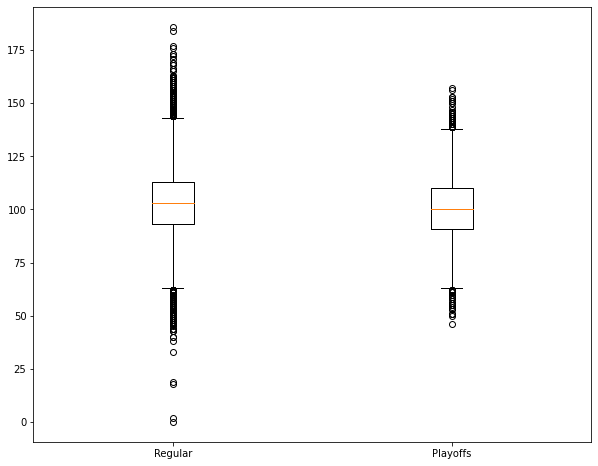

In [30]:
# look at distribution of scores in regular and post seasons
fix,ax = plt.subplots(figsize=(10,8))
ax.boxplot([data1[data1['is_playoffs']==0]['pts'],data1[data1['is_playoffs']==1]['pts']])
ax.set_xticklabels(['Regular','Playoffs'])
plt.show()
# median seems very similar, but variance is much higher in regular season
# we'll use median score, instead of average score

In [49]:
# for every team and year in regular season, aggregate median pts scored
reg_season_median_data = data1[data1['is_playoffs']==0][['year_id', 'team_id','pts']].groupby(['year_id','team_id']).median(['pts']).reset_index()
# rename last column
reg_season_median_data.rename(columns = {'pts':'pts_reg_median'}, inplace = True)


# for every team and year inplayoffs, find median points scored
postseason_median_data = data1[data1['is_playoffs']==1][['year_id', 'team_id','pts']].groupby(['year_id','team_id']).median(['pts']).reset_index()
# rename last column
postseason_median_data.rename(columns = {'pts':'pts_post_median'}, inplace = True)

# join two datasets together
# this should give us regular season median scores and postseason median scores 
# for teams that have played in the playoffs for each year they have played
postseason_median_data.merge(reg_season_median_data,how = 'inner', on=['year_id','team_id'], validate='1:1')

,year_id,team_id,pts_post_median,pts_reg_median
0,1947,CHS,71.0,76.0
1,1947,CLR,74.0,72.5
2,1947,NYK,70.0,63.5
3,1947,PHW,75.0,67.0
4,1947,STB,68.0,66.0
...,...,...,...,...
882,2015,NOP,98.5,100.0
883,2015,POR,93.0,103.0
884,2015,SAS,105.0,102.0
885,2015,TOR,96.5,104.0


In [53]:
playoff_median_pts_data = data1[data1['is_playoffs'] == 1].merge(reg_season_median_data, how='inner',on=['year_id','team_id'])

In [96]:
# for each playoff game_id, find which team is the underdog
underdog = pd.DataFrame()
for i in postseason_data['game_id']:
    temp = data1[data1['game_id']==i][['team_id','forecast']]
    if temp.iloc[0,1] > temp.iloc[1,1]:
        value_to_append = temp.iloc[1,0]
    elif temp.iloc[0,1] < temp.iloc[1,1]:
        value_to_append = temp.iloc[0,0]
    underdog = underdog.append({'game_id':i, 'underdog_team_id':value_to_append}, ignore_index=True)

In [99]:
underdog['game_id'].nunique()

4033

In [103]:
playoff_median_underdog_data = playoff_median_pts_data.merge(underdog, how='left',on='game_id')
playoff_median_underdog_data

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,pts_reg_median,underdog_team_id
0,332,194704020CLR,NBA,0,1947,4/2/1947,61,1,CLR,Rebels,77,1289.1487,1304.9407,41.518227,NYK,Knicks,51,1332.1560,1316.3640,H,W,0.581291,NaN,72.5,NYK
1,336,194704050NYK,NBA,1,1947,4/5/1947,62,1,CLR,Rebels,74,1304.9407,1297.5703,40.745140,NYK,Knicks,86,1316.3640,1323.7344,A,L,0.344929,NaN,72.5,CLR
2,340,194704090NYK,NBA,1,1947,4/9/1947,63,1,CLR,Rebels,71,1297.5703,1287.1998,39.657799,NYK,Knicks,93,1323.7344,1334.1049,A,L,0.326016,NaN,72.5,CLR
3,332,194704020CLR,NBA,1,1947,4/2/1947,61,1,NYK,Knicks,51,1332.1560,1316.3640,42.715511,CLR,Rebels,77,1289.1487,1304.9407,A,L,0.418709,NaN,63.5,NYK
4,336,194704050NYK,NBA,0,1947,4/5/1947,62,1,NYK,Knicks,86,1316.3640,1323.7344,43.486576,CLR,Rebels,74,1304.9407,1297.5703,H,W,0.655071,NaN,63.5,CLR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8061,63084,201504190MEM,NBA,1,2015,4/19/2015,83,1,POR,Trailblazers,86,1579.5515,1571.2708,47.932629,MEM,Grizzlies,100,1587.3375,1595.6183,A,L,0.349675,NaN,103.0,POR
8062,63092,201504220MEM,NBA,1,2015,4/22/2015,84,1,POR,Trailblazers,82,1571.2708,1563.2300,47.110561,MEM,Grizzlies,97,1595.6183,1603.6591,A,L,0.328318,NaN,103.0,POR
8063,63102,201504250POR,NBA,0,2015,4/25/2015,85,1,POR,Trailblazers,109,1563.2300,1553.7316,46.133003,MEM,Grizzlies,115,1603.6591,1613.1575,H,L,0.584899,NaN,103.0,MEM
8064,63109,201504270POR,NBA,0,2015,4/27/2015,86,1,POR,Trailblazers,99,1553.7316,1560.9326,46.874725,MEM,Grizzlies,92,1613.1575,1605.9564,H,W,0.558127,NaN,103.0,MEM


So now we have this dataset, which contains the playoff data, along with the median score of each team from the regular season, as well as the name of the team considered to be the underdog.
Now we want to see if the underdogs perform better in these playoff games than do the favorites, by comparing the median regular season score to the scores of the playoff games.

We can start by plotting the distribution of the differences between the median and 'pts' for the underdog and favorite teams:

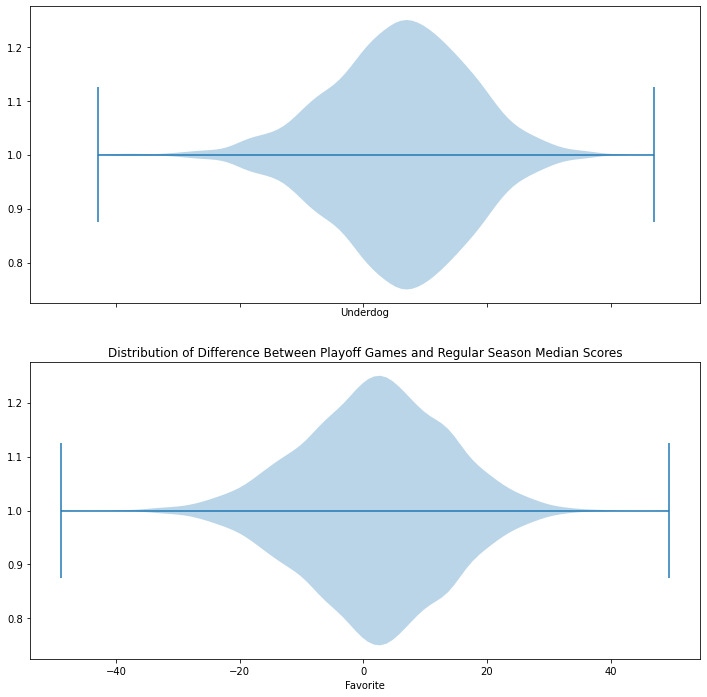

In [135]:
#filter data to rows where underdog is listed first, and calculate the difference and plot


fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12, 12),sharex=True, sharey=True)
plt.title('Distribution of Difference Between Playoff Games and Regular Season Median Scores')
ax1.violinplot(playoff_median_underdog_data[playoff_median_underdog_data['team_id']==playoff_median_underdog_data['underdog_team_id']]['pts_reg_median'] - playoff_median_underdog_data[playoff_median_underdog_data['team_id']==playoff_median_underdog_data['underdog_team_id']]['pts'],vert=False)
ax2.violinplot(playoff_median_underdog_data[playoff_median_underdog_data['team_id']!=playoff_median_underdog_data['underdog_team_id']]['pts_reg_median'] - playoff_median_underdog_data[playoff_median_underdog_data['team_id']!=playoff_median_underdog_data['underdog_team_id']]['pts'],vert=False)
ax1.set_xlabel('Underdog')
ax2.set_xlabel('Favorite')

plt.show()

Looks like the underdogs might score a little better than in the regular season compared to the favorites, but it does not seem like a substancial improvement.

Let's compare this to how many playoff games are won by the underdog vs the favorites:

In [133]:
playoff_median_underdog_data[playoff_median_underdog_data['team_id']==playoff_median_underdog_data['underdog_team_id']].groupby('game_result')['game_id'].nunique()

game_result
L    2712
W    1321
Name: game_id, dtype: int64

Out of all playoff games, the underdogs have won 1321 and lost 2712, so they've lost double what they have won. 